In [12]:
!pip install imblearn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [13]:
# Load the dataset
df = pd.read_csv('personality_datasert.csv')  # Replace with your file path

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (2900, 8)

First 5 Rows:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [15]:
# Check structure
print(df.info())
print(df.describe())
print(df['Personality'].value_counts())

# Convert categorical values
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2900.000000              2900.000000    2900.000000   
mean           4.505816                 3.963354       3.000000   
std            3.441180                 2.872608       2.221597   
min    

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


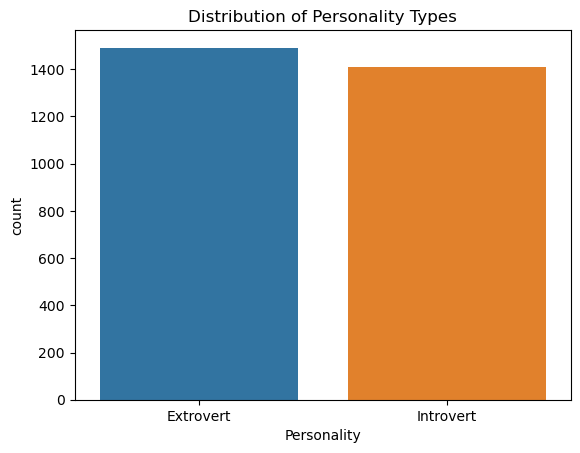

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


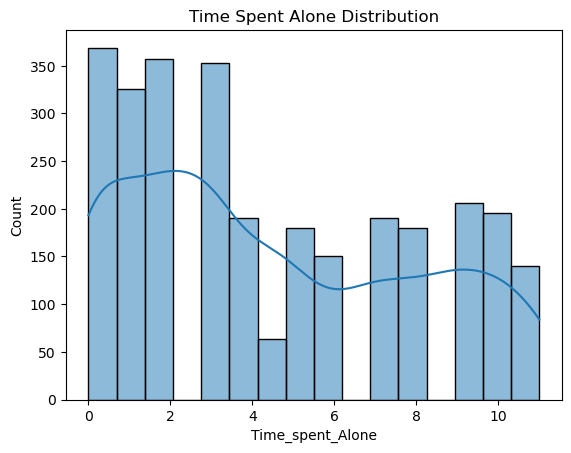

In [16]:
# Personality distribution
sns.countplot(x='Personality', data=df)
plt.title("Distribution of Personality Types")
plt.show()

# Time spent alone
sns.histplot(df['Time_spent_Alone'], kde=True)
plt.title("Time Spent Alone Distribution")
plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


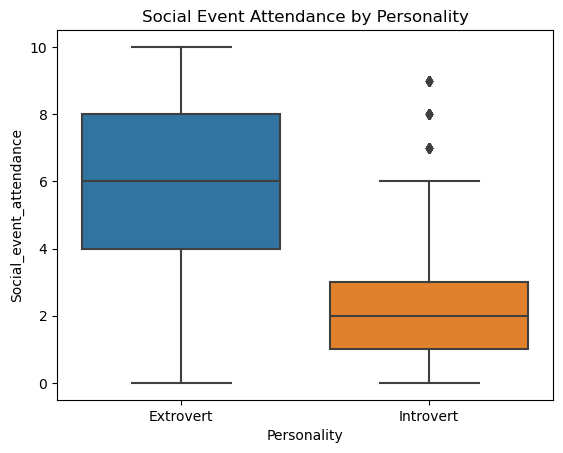

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


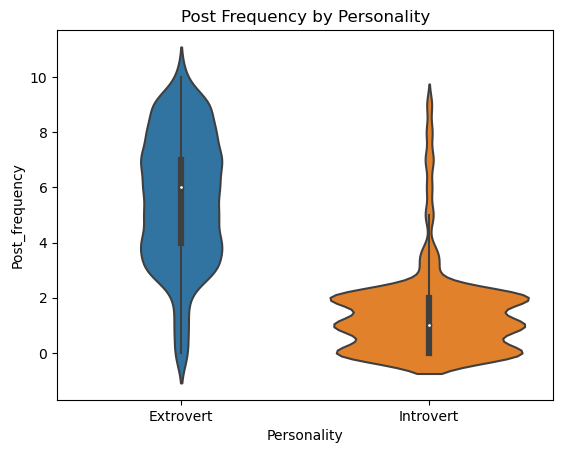

In [17]:
# Compare social event attendance by personality
sns.boxplot(x='Personality', y='Social_event_attendance', data=df)
plt.title("Social Event Attendance by Personality")
plt.show()

# Plot post frequency
sns.violinplot(x='Personality', y='Post_frequency', data=df)
plt.title("Post Frequency by Personality")
plt.show()

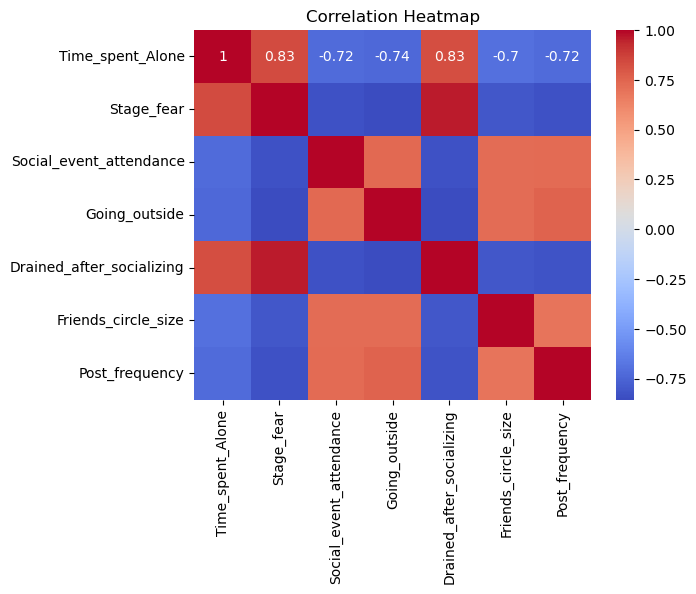

In [18]:
# Encode binary features for correlation
corr_df = df.copy()
corr_df['Personality'] = corr_df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

sns.heatmap(corr_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
Summary of the key findings from the exploratory data analysis (EDA) of your personality traits dataset:

🧠 Personality Distribution
The dataset is heavily skewed toward Extroverts. This suggests a class imbalance, which is something to keep in mind if you're planning predictive modeling.

🧍‍♂️ Univariate Insights
- Time_spent_Alone shows a bimodal distribution: Introverts generally report higher solitary time, while Extroverts cluster toward the lower end.
- Post_frequency is higher on average among Extroverts, aligning with expectations of outward social engagement.
- Stage_fear and Drained_after_socializing are strongly associated with Introverts—high frequency of “Yes” responses.
- Going_outside and Social_event_attendance trend higher for Extroverts.

🔗 Bivariate Highlights
- Boxplots of event attendance vs Personality clearly show extroverts participate more often in social events.
- Violin plots of Post_frequency reveal greater variability and higher frequency for Extroverts, with Introverts posting less and more consistently.

📊 Correlation Heatmap Observations
- Strong positive correlations among:
- Going_outside, Social_event_attendance, and Friends_circle_size
- Strong negative correlation between Time_spent_Alone and variables linked to social activity
- Personality itself correlates positively with social factors and negatively with isolation and social fatigue markers

💡 Overall Takeaways
- The dataset confirms many expected behavioral patterns: Introverts withdraw from high-stimulation environments and tend to post less, socialize less, and feel more drained afterward.
- Extroverts lean toward more social, outgoing behaviors: more friends, more events, more posts—less likelihood of stage fear or social fatigue.


In [21]:
# List your categorical columns
categorical_cols = ['Personality_Introvert', 'Personality_Extrovert']  # Add more if needed

# Create a copy to avoid changing the original
df_lab = df_encoded.copy()

# Apply LabelEncoder to each column
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_lab[col + '_encoded'] = le.fit_transform(df_lab[col])
    le_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save mapping

# Preview result
print(df_lab[[col + '_encoded' for col in categorical_cols]].head())
print("\nLabel Mappings:")
for col, mapping in le_dict.items():
    print(f"{col}: {mapping}")

      Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0           0                      4.0            6.0   
1                  9.0           1                      0.0            0.0   
2                  9.0           1                      1.0            2.0   
3                  0.0           0                      6.0            7.0   
4                  3.0           0                      9.0            4.0   
...                ...         ...                      ...            ...   
2895               3.0           0                      7.0            6.0   
2896               3.0           0                      8.0            3.0   
2897               4.0           1                      1.0            1.0   
2898              11.0           1                      1.0            3.0   
2899               3.0           0                      6.0            6.0   

      Drained_after_socializing  Friends_circle_size  Post_freq

In [38]:
le = LabelEncoder()

# Apply to a single column
df['Personality_encoded'] = le.fit_transform(df['Personality'])

# View the mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_map)



{'Extrovert': 0, 'Introvert': 1}


In [39]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_encoded
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert,0
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert,1
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert,1
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert,0
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert,0


In [42]:
df_cleaned = df.drop(['Personality'], axis=1)



In [43]:
df_cleaned.rename(columns={'Personality_encoded': 'Personality'}, inplace=True)

In [44]:


df_cleaned.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [54]:
# Split features and target
X = df_cleaned.drop('Personality', axis=1)  
y = df_cleaned['Personality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
#Balancing the Dataset (SMOTE: Oversampling using imblearn library)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [57]:
#Logistic Regression 
lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr_balanced = lr_balanced.predict(X_test_scaled)

print("\nLogistic Regression Performance (With Balancing):")
print(classification_report(y_test, y_pred_lr_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_balanced))


Logistic Regression Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       463
           1       0.91      0.91      0.91       407

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870

Confusion Matrix:
[[427  36]
 [ 36 371]]


In [58]:
#Random Forest
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

print("\nRandom Forest Performance (With Balancing):")
print(classification_report(y_test, y_pred_rf_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_balanced))


Random Forest Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       463
           1       0.90      0.90      0.90       407

    accuracy                           0.91       870
   macro avg       0.91      0.91      0.91       870
weighted avg       0.91      0.91      0.91       870

Confusion Matrix:
[[424  39]
 [ 41 366]]


In [59]:
#Hyperparameter Tuning (Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Evaluate tuned Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("\nTuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870

Confusion Matrix:
[[426  37]
 [ 29 378]]


In [60]:
#Cross-Validation (Random Forest)
cv_scores_rf = cross_val_score(best_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())


Random Forest Cross-Validation Scores: [0.91747573 0.93673966 0.93430657 0.9513382  0.94890511]
Mean CV Accuracy: 0.937753053173647


In [61]:
#Gradient Boosting Trees (GBT)
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train_balanced, y_train_balanced)
y_pred_gbt = gbt.predict(X_test_scaled)

print("\nGradient Boosting Trees Performance:")
print(classification_report(y_test, y_pred_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))


Gradient Boosting Trees Performance:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.92      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870

Confusion Matrix:
[[427  36]
 [ 29 378]]


In [64]:
# Define hyperparameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],         # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                # Type of regularization
    'solver': ['liblinear'],                # 'liblinear' supports l1 and l2
    'max_iter': [100, 200, 500]             # Iterations
}

# Create GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_balanced, y_train_balanced)

# Best estimator
best_lr = grid_search_lr.best_estimator_

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred_lr = best_lr.predict(X_test_scaled)

print("🔍 Best Logistic Regression Params:", grid_search_lr.best_params_)
print("\n📊 Tuned Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

🔍 Best Logistic Regression Params: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870

Confusion Matrix:
[[427  36]
 [ 28 379]]


In [66]:
# Define hyperparameter grid
param_grid_gbt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Create GridSearchCV
grid_search_gbt = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbt, cv=5, scoring='accuracy')
grid_search_gbt.fit(X_train_balanced, y_train_balanced)

# Best estimator
best_gbt = grid_search_gbt.best_estimator_

# Evaluation
y_pred_gbt = best_gbt.predict(X_test_scaled)

print("🔍 Best GBT Params:", grid_search_gbt.best_params_)
print("\n📊 Tuned GBT Report:")
print(classification_report(y_test, y_pred_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))

🔍 Best GBT Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

📊 Tuned GBT Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870

Confusion Matrix:
[[427  36]
 [ 28 379]]


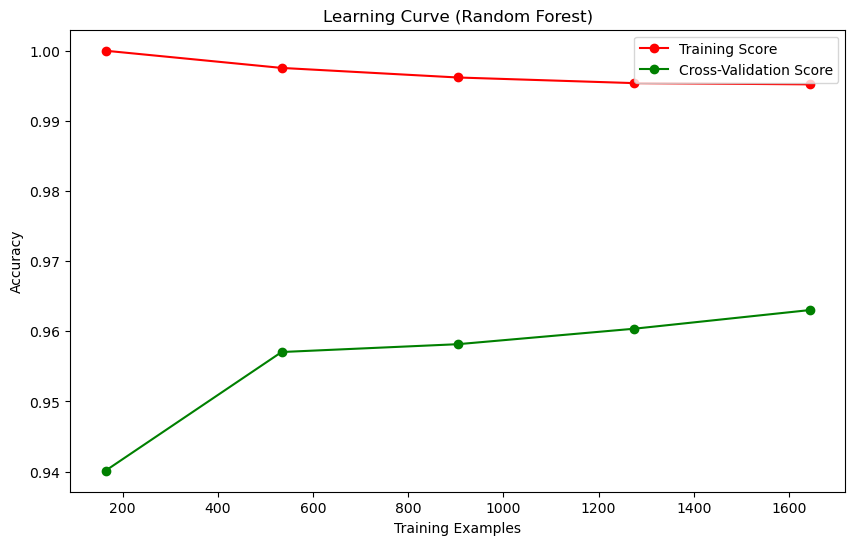

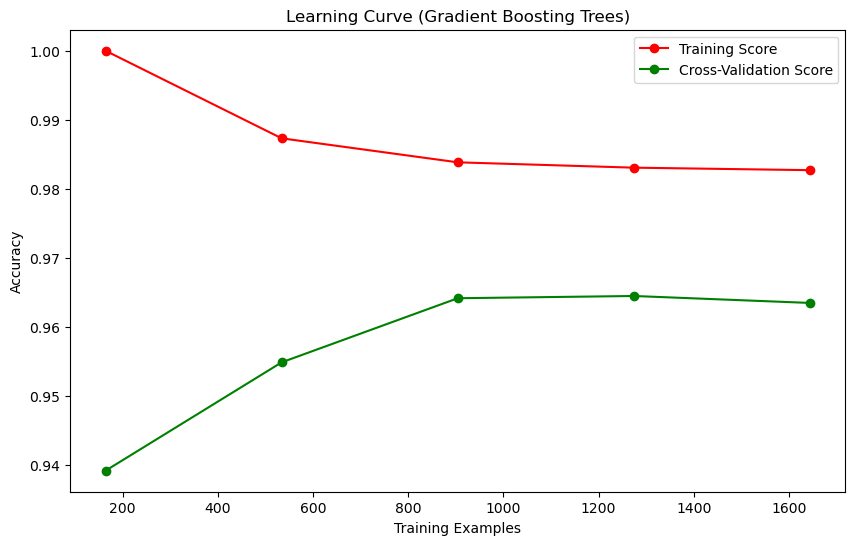

In [71]:
#Bias-Variance Tradeoff (Learning Curves)
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend(loc="best")
    plt.savefig("my1st_plot.png")
    plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(best_rf, "Learning Curve (Random Forest)", X_train_balanced, y_train_balanced)
# Plot learning curve for Gradient Boosting Trees
plot_learning_curve(gbt, "Learning Curve (Gradient Boosting Trees)", X_train_balanced, y_train_balanced)

In [ ]:
✅ Key Observations for the Random Forest Model
Training Score (~0.997 to 1.00):

The model achieves very high accuracy on training data across all sample sizes.

This is expected from Random Forests, which are very good at memorizing the training set, especially with enough trees.

Cross-Validation Score (≈ 0.94 to ≈ 0.963):

Starts lower but increases steadily as more data is used.

The upward trend shows the model is learning and generalizing better with more data.

Gap Between Training and Validation Curves:

There is a small but consistent gap, indicating some variance (model fits training data slightly better than validation data).

However, the gap is narrowing, which suggests improved generalization with increasing data size.

Curves Are Converging but Not Flat Yet:

The model hasn't fully plateaued, especially the validation curve. This suggests:

The model may still benefit from more data.

Or could benefit from tuning parameters like max_depth, n_estimators, or adding regularization (e.g., max_features).

📉 Bias-Variance Diagnosis
Aspect	            |         Interpretation
                    |
Training Accuracy	|  Very high → Low bias
Validation Accuracy	|  Also high but lower than training → Low to moderate variance
Gap between curves	|  Narrowing gap → Good generalization
Curve trends	    |  Still improving → More data might help

In [ ]:
✅ Key Observations for the gbt model


High Training Accuracy (~0.983–1.00)

The model performs extremely well on the training data.

Indicates that GBT can easily fit the training set, even with fewer examples.

Cross-Validation Accuracy Improves With More Data (~0.94 → ~0.965)

As training size increases, test accuracy also increases, but slowly starts to level off.

This is a sign of improved generalization with more data.

Small Gap Between Training and Validation Scores (≈ 0.02)

This suggests low variance (i.e., the model is not overfitting severely).

The model is likely well-regularized or the problem is fairly easy to learn.

Flattening Curves Toward the End

Both training and validation scores plateau as the dataset size increases.

This suggests that adding more training data might not yield much performance gain, and your model has likely learned as much as it can from the available features.

📉 Interpretation Summary
Aspect	Interpretation
Training Accuracy	High (strong learning capacity)
Validation Accuracy	High and close to training (low bias)
Gap Between Curves	Small → Good generalization (low variance)
Curve Shape	Plateauing → Model performance saturates

🧠 What This Means Practically
✅ Your GBT model is performing well, both on training and unseen data.

🚫 No clear signs of overfitting or underfitting.

📈 Adding more data may not help much unless we also:

Add new features

 or Tune hyperparameters 



In [ ]:
In Conclusion 
🆚 Comparison with Gradient Boosting Trees (GBT)
Model	      |   Training Accuracy	  Validation Accuracy	Generalization Gap	    Convergence
Random Forest |	  ~0.997–1.00	      ~0.94–0.963	        Slightly larger gap	    Still improving
GBT	          |  ~0.983–1.00	      ~0.94–0.965	        Slightly smaller gap	More plateaued

➡ Conclusion:
Both models perform well, but GBT shows a slightly better generalization early and plateaus sooner — a sign of possibly better regularization. However, Random Forest is still learning, so it may benefit more from either:

More data,

More trees,

Or regularization tuning.

